In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
x = data["GrLivArea"]

In [9]:
y = data["SalePrice"]

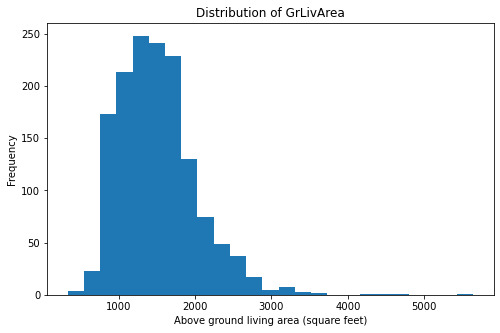

In [10]:
plt.figure(figsize = (8,5))
plt.hist(x, bins = 25)
plt.title("Distribution of GrLivArea")
plt.xlabel("Above ground living area (square feet)")
plt.ylabel("Frequency")
plt.show()

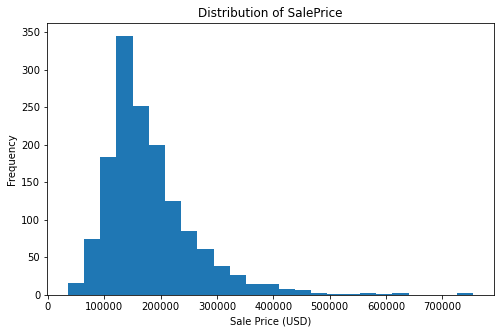

In [11]:
plt.figure(figsize = (8,5))
plt.hist(y, bins = 25)
plt.title("Distribution of SalePrice")
plt.xlabel("Sale Price (USD)")
plt.ylabel("Frequency")
plt.show()

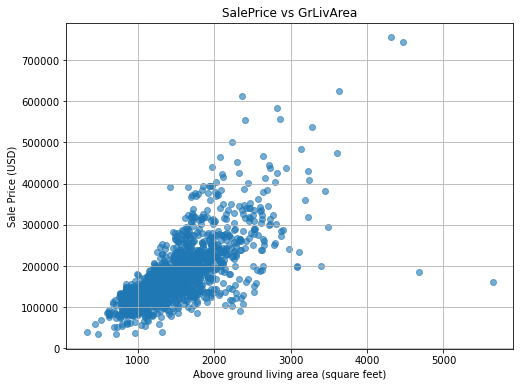

In [12]:
plt.figure(figsize = (8,6))
plt.scatter(x, y, alpha = 0.6)
plt.title("SalePrice vs GrLivArea")
plt.xlabel("Above ground living area (square feet)")
plt.ylabel("Sale Price (USD)")
plt.grid(True)
plt.show()

In [13]:
x_mean = np.mean(x)

In [14]:
y_mean = np.mean(y)

In [15]:
beta1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)

In [16]:
beta0 = y_mean - beta1 * x_mean

In [17]:
simple_ml_estim = np.array([beta0, beta1])

In [18]:
print("Mean of x:", x_mean)
print("Mean of y:", y_mean)
print("Estimated intercept (β0):", beta0)
print("Estimated slope (β1):", beta1)
print("Vector simple_ml_estim =", simple_ml_estim)

Mean of x: 1515.463698630137
Mean of y: 180921.19589041095
Estimated intercept (β0): 18569.02585648728
Estimated slope (β1): 107.13035896582517
Vector simple_ml_estim = [18569.02585649   107.13035897]


In [19]:
X = np.column_stack((np.ones(len(x)), x))

In [20]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [21]:
normal_ml_estim = beta

In [22]:
print("Intercept:", normal_ml_estim[0])
print("Slope:", normal_ml_estim[1])

Intercept: 18569.025856486947
Slope: 107.13035896582537


In [29]:
model = LinearRegression()

In [36]:
model.fit(x.to_numpy().reshape(-1, 1), y)

LinearRegression()

In [45]:
model.score(x.to_numpy().reshape(-1, 1), y)

0.5021486502718042

In [37]:
beta0 = model.intercept_
beta1 = model.coef_[0]

In [38]:
r_ml_estim = np.array([beta0, beta1])

In [39]:
print("Intercept:", beta0)
print("Slope:", beta1)
print("Vector r_ml_estim =", r_ml_estim)

Intercept: 18569.02585648722
Slope: 107.1303589658252
Vector r_ml_estim = [18569.02585649   107.13035897]


In [40]:
x_line = np.linspace(x.min(), x.max(), 100)
y_line = beta0 + beta1 * x_line

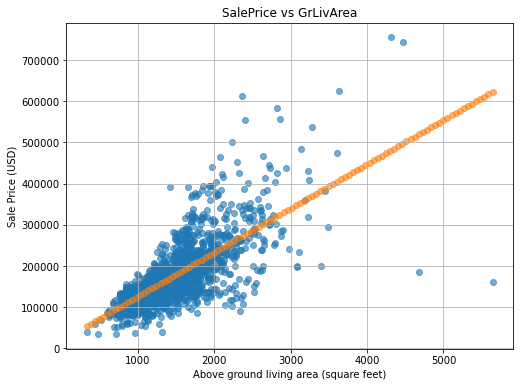

In [47]:
plt.figure(figsize = (8,6))
plt.scatter(x, y, alpha = 0.6)
plt.scatter(x_line, y_line, alpha = 0.6)
plt.title("SalePrice vs GrLivArea")
plt.xlabel("Above ground living area (square feet)")
plt.ylabel("Sale Price (USD)")
plt.grid(True)
plt.show()

In [42]:
print("simple_ml_estim =", simple_ml_estim)
print("normal_ml_estim =", normal_ml_estim)
print("r_ml_estim      =", r_ml_estim)

print("\nAre simple_ml_estim and normal_ml_estim equal?")
print(np.allclose(simple_ml_estim, normal_ml_estim))

print("\nAre simple_ml_estim and r_ml_estim equal?")
print(np.allclose(simple_ml_estim, r_ml_estim))

print("\nAre normal_ml_estim and r_ml_estim equal?")
print(np.allclose(normal_ml_estim, r_ml_estim))

simple_ml_estim = [18569.02585649   107.13035897]
normal_ml_estim = [18569.02585649   107.13035897]
r_ml_estim      = [18569.02585649   107.13035897]

Are simple_ml_estim and normal_ml_estim equal?
True

Are simple_ml_estim and r_ml_estim equal?
True

Are normal_ml_estim and r_ml_estim equal?
True


In [51]:
y_pred = model.predict(x.to_numpy().reshape(-1, 1))

In [52]:
residuals = y - y_pred

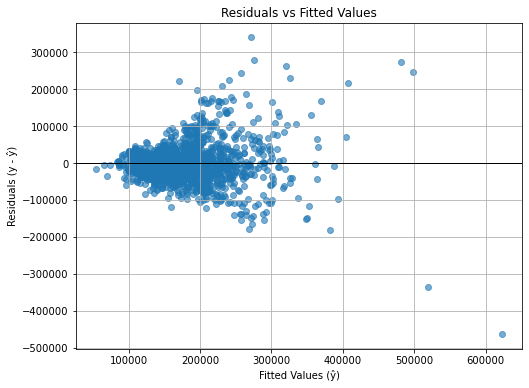

In [53]:
plt.figure(figsize = (8,6))
plt.scatter(y_pred, residuals, alpha = 0.6)
plt.axhline(0, color='black', linewidth = 1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (ŷ)")
plt.ylabel("Residuals (y - ŷ)")
plt.grid(True)
plt.show()

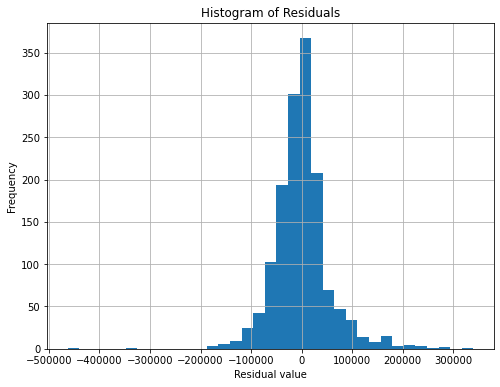

In [56]:
plt.figure(figsize = (8,6))
plt.hist(residuals, bins = 35)
plt.title("Histogram of Residuals")
plt.xlabel("Residual value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

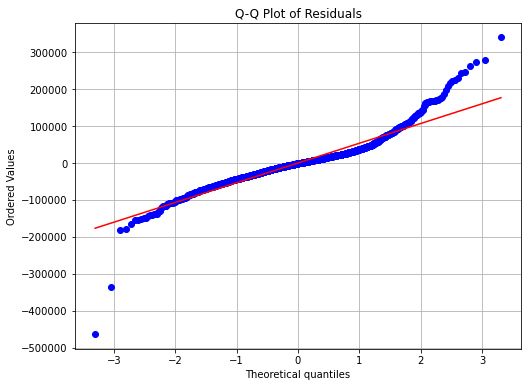

In [58]:
plt.figure(figsize = (8,6))
stats.probplot(residuals, dist = "norm", plot = plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

Based on the residuals analysis, a logarithmic transformation of the target variable SalePrice is recommended.
The residuals display heteroscedasticity and right-skewness, and the Q–Q plot deviates from normality.
Applying $log(y)$ generally reduces skewness, stabilizes variance, and results in a model that better satisfies the Gauss–Markov assumptions.

In [59]:
y_transformed = np.log1p(y)

In [60]:
model_t = LinearRegression()

In [62]:
model_t.fit(x.to_numpy().reshape(-1,1), y_transformed)

LinearRegression()

In [64]:
y_pred_t = model_t.predict(x.to_numpy().reshape(-1,1))

In [65]:
residuals_t = y_transformed - y_pred_t

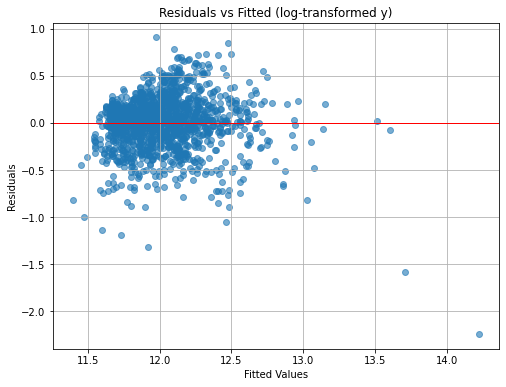

In [67]:
plt.figure(figsize = (8,6))
plt.scatter(y_pred_t, residuals_t, alpha = 0.6)
plt.axhline(0, color = 'red', linewidth = 1)
plt.title("Residuals vs Fitted (log-transformed y)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

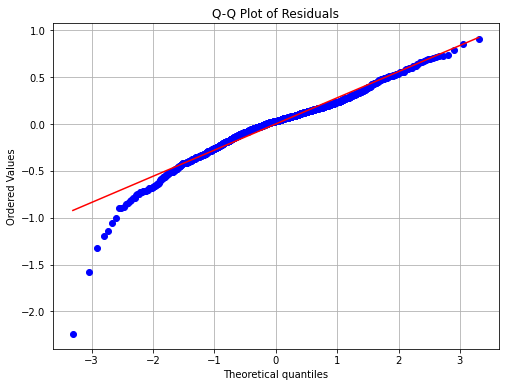

In [83]:
plt.figure(figsize = (8,6))
stats.probplot(residuals_t, dist = "norm", plot = plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

In [84]:
n = len(y)

In [85]:
p = 2

In [86]:
SSR = np.sum(residuals**2)

In [87]:
sigma2 = SSR / (n - p)

In [88]:
print("SSR =", SSR)
print("Unbiased sigma² =", sigma2)

SSR = 4584171086113.13
Unbiased sigma² = 3144150264.82382
